In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<AxesSubplot:>

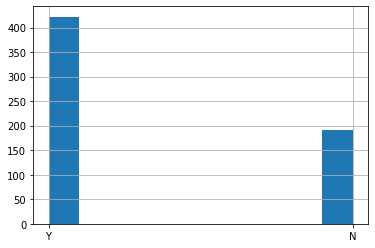

In [11]:
train['Loan_Status'].hist()

In [12]:
train['Loan_Status'] = train['Loan_Status'].map({'Y':1,'N':0})

In [13]:
tr_gen = train.groupby('Gender')['ApplicantIncome'].mean()
tr_gen = tr_gen.to_dict()
train['Gender'] = train['Gender'].map(tr_gen)

In [14]:
test['Gender'] = test['Gender'].map(tr_gen)
train['Gender'] = train['Gender'].fillna(train['Gender'].mean())
test['Gender'] = test['Gender'].fillna(test['Gender'].mean())

In [15]:
test['Gender'].isnull().sum()

0

In [16]:
train['Gender'].isnull().sum()

0

<AxesSubplot:>

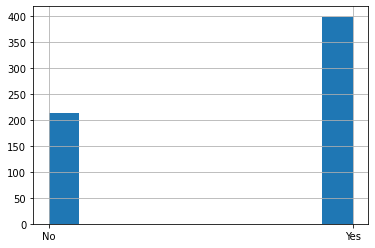

In [17]:
train['Married'].hist()

In [18]:
married = pd.get_dummies(train['Married'],drop_first = True)
train = pd.concat([train,married],axis=1)

<AxesSubplot:>

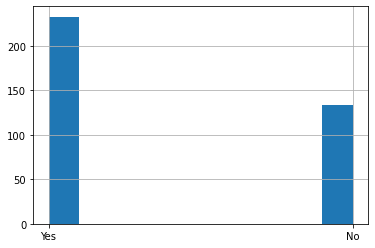

In [19]:
test['Married'].hist()

In [20]:
test_marr = pd.get_dummies(test['Married'])
test = pd.concat([test,test_marr],axis=1)

In [21]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

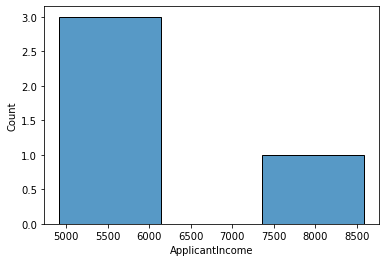

In [22]:
sns.histplot(train.groupby('Dependents')['ApplicantIncome'].mean())

In [23]:
dep_income = train.groupby(['Dependents'])['ApplicantIncome'].mean()
dep_income

Dependents
0     4917.423188
1     5962.274510
2     4926.782178
3+    8581.215686
Name: ApplicantIncome, dtype: float64

In [24]:
train['Dependents'] = train['Dependents'].map(dep_income.to_dict())
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mean())
train['Dependents'].isnull().sum()

0

In [25]:
test['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [26]:
test['Dependents'] = test['Dependents'].map(dep_income.to_dict())
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mean())
test['Dependents'].isnull().sum()

0

In [27]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [28]:
edu = train.groupby('Education')['Loan_Status'].mean()

In [29]:
train['Education'] = train['Education'].map(edu.to_dict())

In [30]:
train['Education'].isnull().sum()

0

In [31]:
test['Education'] = test['Education'].map(edu.to_dict())

In [32]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,No,Yes
0,LP001015,5446.460123,Yes,4917.423188,0.708333,No,5720,0,110.0,360.0,1.0,Urban,0,1
1,LP001022,5446.460123,Yes,5962.274510,0.708333,No,3076,1500,126.0,360.0,1.0,Urban,0,1
2,LP001031,5446.460123,Yes,4926.782178,0.708333,No,5000,1800,208.0,360.0,1.0,Urban,0,1
3,LP001035,5446.460123,Yes,4926.782178,0.708333,No,2340,2546,100.0,360.0,NaN,Urban,0,1
4,LP001051,5446.460123,No,4917.423188,0.611940,No,3276,0,78.0,360.0,1.0,Urban,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,5446.460123,Yes,8581.215686,0.611940,Yes,4009,1777,113.0,360.0,1.0,Urban,0,1
363,LP002975,5446.460123,Yes,4917.423188,0.708333,No,4158,709,115.0,360.0,1.0,Urban,0,1
364,LP002980,5446.460123,No,4917.423188,0.708333,No,3250,1993,126.0,360.0,NaN,Semiurban,1,0
365,LP002986,5446.460123,Yes,4917.423188,0.708333,No,5000,2393,158.0,360.0,1.0,Rural,0,1


In [33]:
train['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [34]:
test['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [35]:
self_cred = train.groupby('Self_Employed')['Loan_Status'].mean()
self_cred.to_dict()

{'No': 0.686, 'Yes': 0.6829268292682927}

In [36]:
train['Self_Employed'] = train['Self_Employed'].map(self_cred.to_dict())

In [37]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mean())

In [38]:
test['Self_Employed'] = test['Self_Employed'].map(self_cred.to_dict())
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mean())

In [39]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())

<AxesSubplot:ylabel='Frequency'>

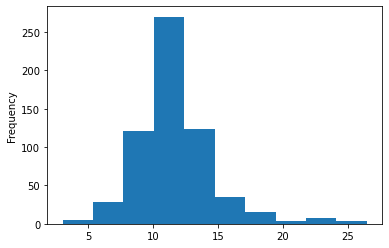

In [40]:
np.power(train['LoanAmount'],1/2).plot.hist()

(array([  2.,   9.,  37., 153., 259.,  93.,  37.,  11.,   8.,   5.]),
 array([2.08008382, 2.75997944, 3.43987506, 4.11977068, 4.7996663 ,
        5.47956192, 6.15945754, 6.83935316, 7.51924878, 8.1991444 ,
        8.87904002]),
 <BarContainer object of 10 artists>)

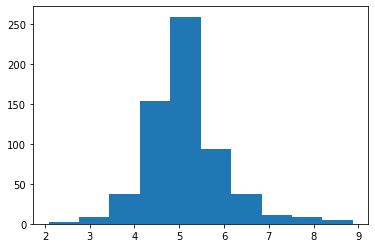

In [41]:
plt.hist(np.power(train['LoanAmount'],1/3))

In [42]:
loan_amount_term = pd.get_dummies(train['Loan_Amount_Term'],drop_first=True)

In [43]:
train = pd.concat([train,loan_amount_term],axis=1)

In [44]:
loan_amount_term1 = pd.get_dummies(test['Loan_Amount_Term'],drop_first=True)
test = pd.concat([test,loan_amount_term1],axis=1)

In [45]:
train.drop('Loan_Amount_Term',axis=1,inplace=True)

In [46]:
test.drop('Loan_Amount_Term',axis=1,inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

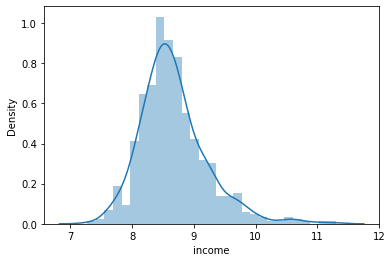

In [47]:
train['income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
sns.distplot(np.log(train['income']))

In [48]:
train.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [49]:
train['income'] = np.log(train['income'])

<AxesSubplot:>

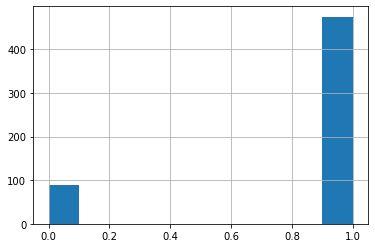

In [50]:
train['Credit_History'].hist()

In [51]:
cred_hist = train.groupby('Credit_History')['Loan_Status'].mean()
cred_hist

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [52]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [53]:
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [54]:
test['Credit_History'].unique()

array([1.        , 0.82544379, 0.        ])

<AxesSubplot:>

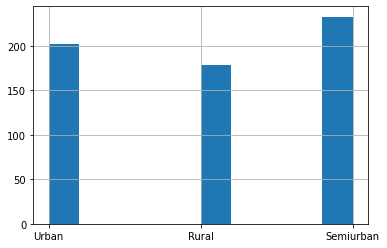

In [55]:
train['Property_Area'].hist()

<AxesSubplot:xlabel='Property_Area'>

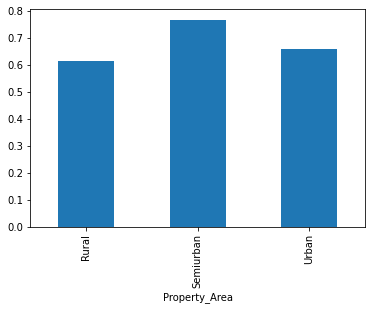

In [56]:
(train.groupby('Property_Area')['Loan_Status'].mean()).plot.bar()

In [57]:
df_1 = pd.get_dummies(train['Property_Area'],drop_first=True)

In [58]:
train = pd.concat([train,df_1],axis=1)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,...,84.0,120.0,180.0,240.0,300.0,360.0,480.0,income,Semiurban,Urban
0,LP001002,5446.460123,No,4917.423188,0.708333,0.686000,146.412162,1.0,Urban,1,...,0,0,0,0,0,1,0,8.674026,0,1
1,LP001003,5446.460123,Yes,5962.274510,0.708333,0.686000,128.000000,1.0,Rural,0,...,0,0,0,0,0,1,0,8.714568,0,0
2,LP001005,5446.460123,Yes,4917.423188,0.708333,0.682927,66.000000,1.0,Urban,1,...,0,0,0,0,0,1,0,8.006368,0,1
3,LP001006,5446.460123,Yes,4917.423188,0.611940,0.686000,120.000000,1.0,Urban,1,...,0,0,0,0,0,1,0,8.505323,0,1
4,LP001008,5446.460123,No,4917.423188,0.708333,0.686000,141.000000,1.0,Urban,1,...,0,0,0,0,0,1,0,8.699515,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,4643.473214,No,4917.423188,0.708333,0.686000,71.000000,1.0,Rural,1,...,0,0,0,0,0,1,0,7.972466,0,0
610,LP002979,5446.460123,Yes,8581.215686,0.708333,0.686000,40.000000,1.0,Rural,1,...,0,0,1,0,0,0,0,8.320205,0,0
611,LP002983,5446.460123,Yes,5962.274510,0.708333,0.686000,253.000000,1.0,Urban,1,...,0,0,0,0,0,1,0,9.025456,0,1
612,LP002984,5446.460123,Yes,4926.782178,0.708333,0.686000,187.000000,1.0,Urban,1,...,0,0,0,0,0,1,0,8.933664,0,1


In [59]:
df_2 = pd.get_dummies(test['Property_Area'],drop_first=True)
test = pd.concat([test,df_2],axis=1)
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,...,120.0,180.0,240.0,300.0,350.0,360.0,480.0,income,Semiurban,Urban
0,LP001015,5446.460123,Yes,4917.423188,0.708333,0.686000,5720,0,110.0,1.000000,...,0,0,0,0,0,1,0,5720,0,1
1,LP001022,5446.460123,Yes,5962.274510,0.708333,0.686000,3076,1500,126.0,1.000000,...,0,0,0,0,0,1,0,4576,0,1
2,LP001031,5446.460123,Yes,4926.782178,0.708333,0.686000,5000,1800,208.0,1.000000,...,0,0,0,0,0,1,0,6800,0,1
3,LP001035,5446.460123,Yes,4926.782178,0.708333,0.686000,2340,2546,100.0,0.825444,...,0,0,0,0,0,1,0,4886,0,1
4,LP001051,5446.460123,No,4917.423188,0.611940,0.686000,3276,0,78.0,1.000000,...,0,0,0,0,0,1,0,3276,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,5446.460123,Yes,8581.215686,0.611940,0.682927,4009,1777,113.0,1.000000,...,0,0,0,0,0,1,0,5786,0,1
363,LP002975,5446.460123,Yes,4917.423188,0.708333,0.686000,4158,709,115.0,1.000000,...,0,0,0,0,0,1,0,4867,0,1
364,LP002980,5446.460123,No,4917.423188,0.708333,0.686000,3250,1993,126.0,0.825444,...,0,0,0,0,0,1,0,5243,1,0
365,LP002986,5446.460123,Yes,4917.423188,0.708333,0.686000,5000,2393,158.0,1.000000,...,0,0,0,0,0,1,0,7393,0,0


In [60]:
train_data = train.drop(['Loan_ID','Married','Property_Area'],axis=1)
train_data.isnull().sum()

Gender            0
Dependents        0
Education         0
Self_Employed     0
LoanAmount        0
Credit_History    0
Loan_Status       0
Yes               0
36.0              0
60.0              0
84.0              0
120.0             0
180.0             0
240.0             0
300.0             0
360.0             0
480.0             0
income            0
Semiurban         0
Urban             0
dtype: int64

In [61]:
X = train_data.drop('Loan_Status',axis=1)
y = train_data.Loan_Status

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
X_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.1,random_state=9)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(x_val)
print(accuracy_score(y_val,knn_pred))
print(confusion_matrix(y_val,knn_pred))
print(f1_score(y_val,knn_pred))

0.5161290322580645
[[ 4 18]
 [12 28]]
0.6511627906976744


Text(0.5, 1.0, 'parameter tuning')

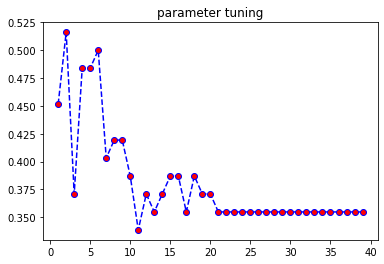

In [64]:
error = []
for i in range(1,40):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train)
    knn1_pred = knn1.predict(x_val)
    error.append(np.mean(y_val!=knn1_pred))
plt.plot(range(1,40),error,color='blue',markerfacecolor='red',marker='o',linestyle='dashed')
plt.title('parameter tuning')

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(x_val)
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(f1_score(y_val,y_pred))

0.7741935483870968
[[10 12]
 [ 2 38]]
0.8444444444444444


In [66]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(X_train,y_train)
tree_predictions = tree.predict(x_val)
print(accuracy_score(y_val,tree_predictions))
print(confusion_matrix(y_val,tree_predictions))
print(f1_score(y_val,tree_predictions))

0.8225806451612904
[[11 11]
 [ 0 40]]
0.8791208791208792


In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
lr_pred = lr.predict(x_val)
print(accuracy_score(y_val,lr_pred))
print(confusion_matrix(y_val,lr_pred))
print(f1_score(y_val,lr_pred))

0.8064516129032258
[[10 12]
 [ 0 40]]
0.8695652173913044


Text(0.5, 1.0, 'parameter tuning')

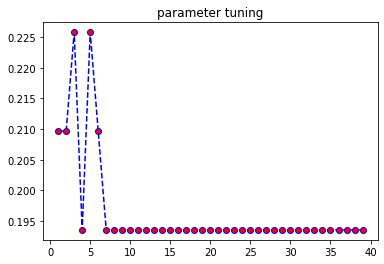

In [68]:
error = []
for i in range(1,40):
    knn1 = RandomForestClassifier(criterion='entropy',min_samples_split=i+1)
    knn1.fit(X_train,y_train)
    knn1_pred = knn1.predict(x_val)
    error.append(np.mean(y_val!=knn1_pred))
plt.plot(range(1,40),error,color='blue',markerfacecolor='red',marker='o',linestyle='dashed')
plt.title('parameter tuning')

Text(0.5, 1.0, 'parameter tuning')

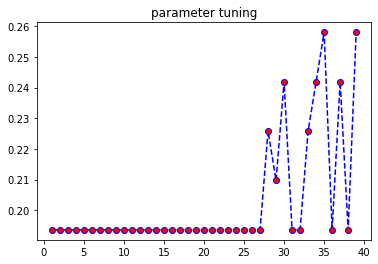

In [69]:
error = []
for i in range(1,40):
    knn1 = RandomForestClassifier(criterion='entropy',min_samples_split=17,min_samples_leaf=i)
    knn1.fit(X_train,y_train)
    knn1_pred = knn1.predict(x_val)
    error.append(np.mean(y_val!=knn1_pred))
plt.plot(range(1,40),error,color='blue',markerfacecolor='red',marker='o',linestyle='dashed')
plt.title('parameter tuning')

Text(0.5, 1.0, 'parameter tuning')

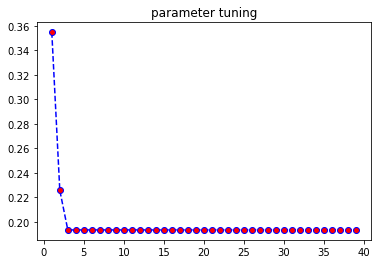

In [70]:
error = []
for i in range(1,40):
    knn1 = RandomForestClassifier(criterion='entropy',min_samples_split=14,max_depth=i,min_samples_leaf=6)
    knn1.fit(X_train,y_train)
    knn1_pred = knn1.predict(x_val)
    error.append(np.mean(y_val!=knn1_pred))
plt.plot(range(1,40),error,color='blue',markerfacecolor='red',marker='o',linestyle='dashed')
plt.title('parameter tuning')

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',min_samples_split=14,max_depth=10,min_samples_leaf=6)
rf.fit(X_train,y_train)
y_pred = rf.predict(x_val)
print(accuracy_score(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))
print(f1_score(y_val,y_pred))

0.8064516129032258
[[10 12]
 [ 0 40]]
0.8695652173913044


In [72]:
#test dataset
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
No                   0
Yes                  0
12.0                 0
36.0                 0
60.0                 0
84.0                 0
120.0                0
180.0                0
240.0                0
300.0                0
350.0                0
360.0                0
480.0                0
income               0
Semiurban            0
Urban                0
dtype: int64

In [73]:
test_data = test.drop(['Loan_ID','Married','Education','Property_Area','ApplicantIncome','CoapplicantIncome'],axis=1)

In [74]:
pred = rf.predict(test_data)

ValueError: Number of features of the model must match the input. Model n_features is 19 and input n_features is 21 

In [ ]:
predictions = pd.DataFrame({'Loan_ID':test['Loan_ID'],'Loan_Status': pred})
predictions['Loan_Status'] = predictions['Loan_Status'].map({0:'Y',1:'N'})

In [ ]:
predictions.to_csv('Loan_prediction.csv',index=False)